# Displaying the /proc/pressure based metrics

## Pi-Job(2000)

In [26]:
# Loading event json
import json
import statistics

# Plotting the timeline
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime, timedelta

In [27]:
exp_lines = {
    0 : {
        'start' : 50,
        'end' : 251
    },
    1 : {
        'start' : 292,
        'end' : 395
    },
    2 : {
        'start' : 1049,
        'end' : 1155
    },
    4 : {
        'start' : 1836,
        'end' : 1947
    },
    8 : {
        'start' : 2704,
        'end' : 2910
    },
    16 : {
        'start' : 3940,
        'end' : 4272
    },
    24 : {
        'start' : 5588,
        'end' : 6095
    },
}

completion = [[9, 8, 9, 14, 26, 41], [9,8,8,15,26,42], [8,8,9,13,27,41], [8,8,9,14,27,40], [9,9,8,14,28,41]]


In [28]:
data = {}
with open('cpu-vs-util.txt', 'r') as file:
    lines = file.readlines()
    for key in exp_lines.keys():
        data[key] = {}
        data[key]['util'] = [float(line.rstrip('\n').split()[5]) for line in lines[exp_lines[key]['start']:exp_lines[key]['end']] 
                            if "(metrics)" in line]
        data[key]['pressure'] = [float(line.rstrip('\n').split()[8]) / 100000.0 for line in lines[exp_lines[key]['start']:exp_lines[key]['end']] 
                                 if "(metrics)" in line]

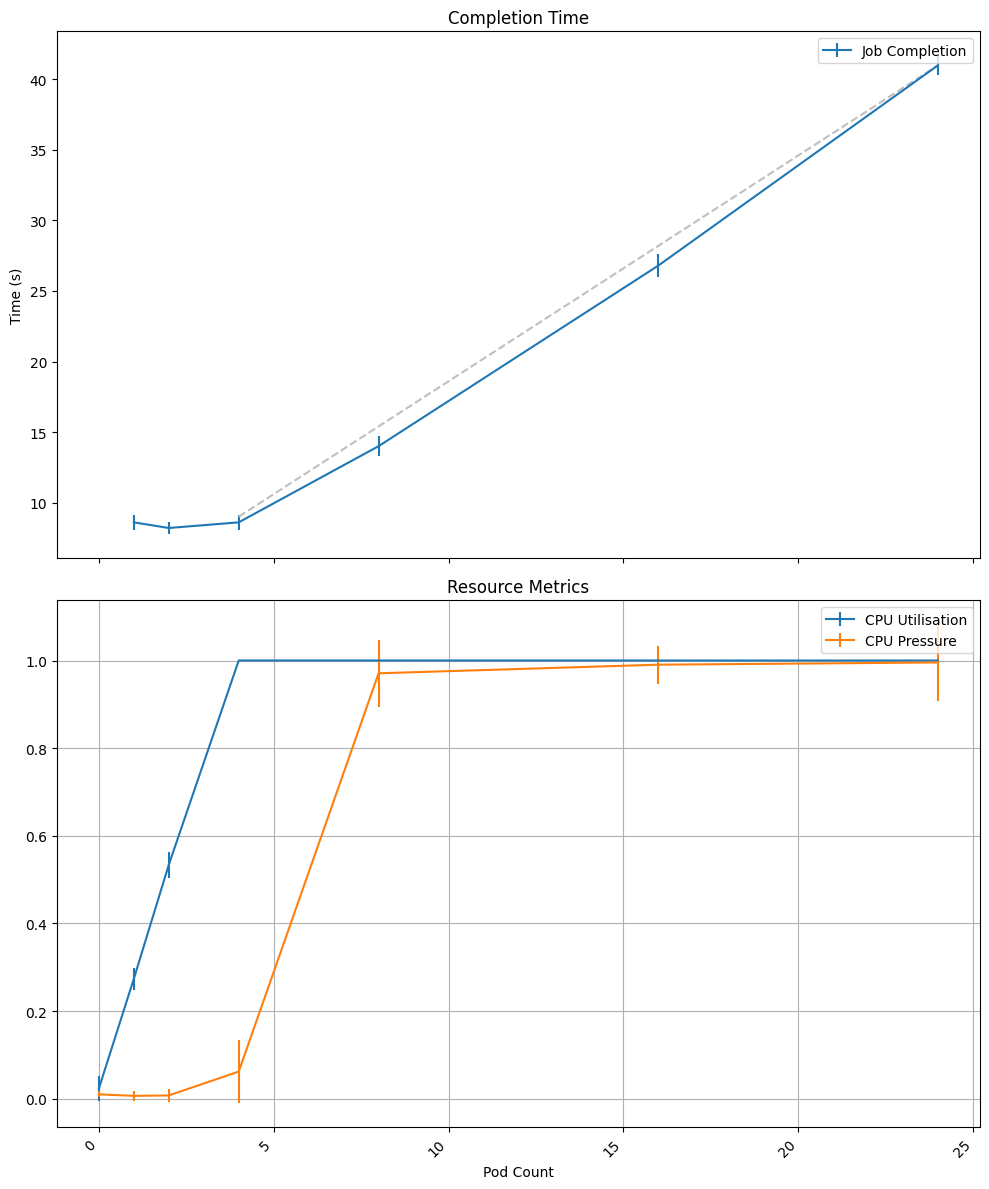

In [34]:
# 1. Parse time strings into datetime objects

x = sorted(data.keys())

fig, axes = plt.subplots(2, 1, figsize=(10, 12), sharex=True)

util_means = []
util_stds = []

pressure_means = []
pressure_stds = []

for key in x:
    util_means.append(statistics.mean(data[key]['util']))
    util_stds.append(statistics.stdev(data[key]['util']))

    pressure_means.append(statistics.mean(data[key]['pressure']))
    pressure_stds.append(statistics.stdev(data[key]['pressure']))

completion_means = []
completion_stds = []

for i in range(len(completion[0])):
    results = [iteration[i] for iteration in completion]
    completion_means.append(statistics.mean(results))
    completion_stds.append(statistics.stdev(results))

axes[0].errorbar(x[1:], completion_means, yerr=completion_stds, label="Job Completion")
axes[0].plot([4,24], [9, 41], linestyle='--', color='0.75')
axes[1].errorbar(x, util_means, yerr=util_stds, label="CPU Utilisation")
axes[1].errorbar(x, pressure_means, yerr=pressure_stds, label="CPU Pressure")
    

# Customize the plot
axes[1].set_xlabel("Pod Count")
axes[0].set_ylabel("Time (s)")
axes[0].set_title("Completion Time")
axes[1].set_title("Resource Metrics")
plt.grid(True)
axes[0].legend()
axes[1].legend()
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping

# Display the plot
plt.savefig('figures/podcount-util-pressure.png')
plt.show()

## ML

In [3]:
# Loading event json
import json
import statistics

# Plotting the timeline
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime, timedelta

In [40]:
exp_lines = {
    0 : {
        'start' : 4,
        'end' : 244
    },
    1 : {
        'start' : 289,
        'end' : 818
    },
    2 : {
        'start' : 1546,
        'end' : 2371
    },
    4 : {
        'start' : 3338,
        'end' : 4852
    },
    8 : {
        'start' : 5945,
        'end' : 8900
    },
}

pod_completion = [[24,25], [39,38], [7,72,71,70], [140,136,140,138,140,141,136,141]]
job_completion = [[24,27],[43,42],[73,75],[144,143]]


In [41]:
data = {}
with open('ml-cpu-vs-util.txt', 'r') as file:
    lines = file.readlines()
    for key in exp_lines.keys():
        data[key] = {}
        data[key]['CPU Utilisation'] = [float(line.rstrip('\n').split()[5]) for line in lines[exp_lines[key]['start']:exp_lines[key]['end']] 
                            if "(metrics)" in line]
        data[key]['Memory Utilisation'] = [float(line.rstrip('\n').split()[8]) for line in lines[exp_lines[key]['start']:exp_lines[key]['end']] 
                            if "(metrics)" in line]
        data[key]['CPU Pressure'] = [float(line.rstrip('\n').split()[11]) / 100000.0 for line in lines[exp_lines[key]['start']:exp_lines[key]['end']] 
                                 if "(metrics)" in line]
        #data[key]['Memory Pressure'] = [float(line.rstrip('\n').split()[14]) / 100000.0 for line in lines[exp_lines[key]['start']:exp_lines[key]['end']] 
        #                        if "(metrics)" in line]

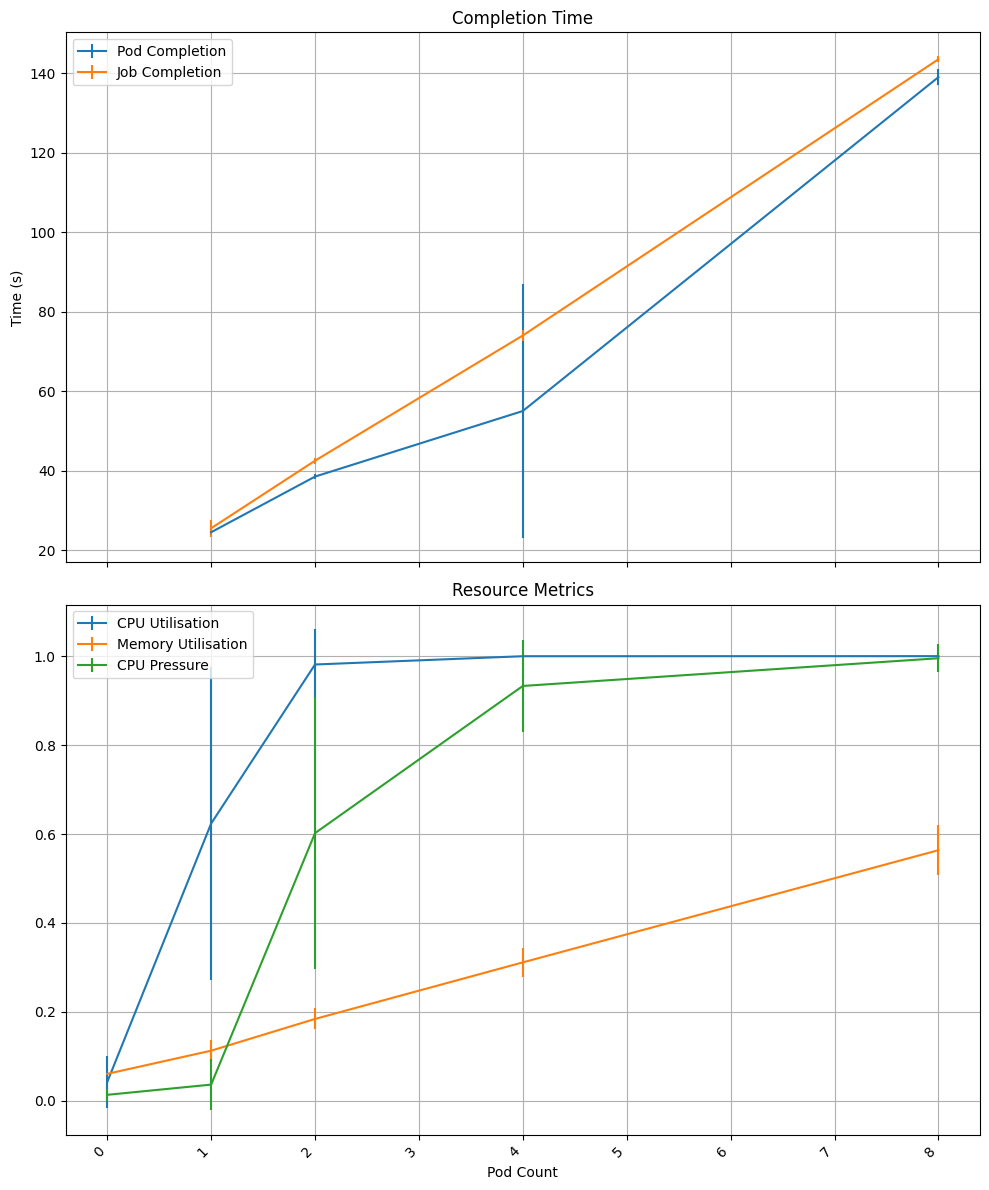

In [44]:
# 1. Parse time strings into datetime objects

x = sorted(data.keys())

fig, axes = plt.subplots(2, 1, figsize=(10, 12), sharex=True)

pod_means = [statistics.mean(timings) for timings in pod_completion]
pod_stds = [statistics.stdev(timings) for timings in pod_completion]
axes[0].errorbar(x[1:], pod_means, yerr=pod_stds, label="Pod Completion")

job_means = [statistics.mean(timings) for timings in job_completion]
job_stds = [statistics.stdev(timings) for timings in job_completion]
axes[0].errorbar(x[1:], job_means, yerr=job_stds, label="Job Completion")

metrics = data[0].keys()

for metric in metrics:
    means = []
    stds = []
    for key in x:
        means.append(statistics.mean(data[key][metric]))
        stds.append(statistics.stdev(data[key][metric]))

    axes[1].errorbar(x, means, yerr=stds, label=metric)
    

# Customize the plot
axes[1].set_xlabel("Pod Count")
axes[0].set_ylabel("Time (s)")
axes[0].set_title("Completion Time")
axes[1].set_title("Resource Metrics")
axes[0].grid(True)
axes[1].grid(True)
axes[0].legend()
axes[1].legend()
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping

# Display the plot
plt.savefig('figures/ml-podcount-util-pressure.png')
plt.show()